In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

threshold = 1

In [3]:
daily_stock_data_filename = './../data/daily_data_2005-2021_filtered_nyse.pkl'

daily_stock_data = pd.read_pickle(daily_stock_data_filename)

display(daily_stock_data.head())

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic
2604,1004,1,2005/01/03,AIR,000361105,1.0,32246000.0,296100.0,13.61,13.83,13.14,13.72,3.0,1.55331,11.0,USA,USA,5080.0
2605,1004,1,2005/01/04,AIR,000361105,1.0,32246000.0,277600.0,12.85,13.61,12.82,13.61,3.0,1.55331,11.0,USA,USA,5080.0
2606,1004,1,2005/01/05,AIR,000361105,1.0,32246000.0,360600.0,12.31,12.80,12.11,12.79,3.0,1.55331,11.0,USA,USA,5080.0
2607,1004,1,2005/01/06,AIR,000361105,1.0,32254000.0,243600.0,12.22,12.44,12.15,12.40,3.0,1.55331,11.0,USA,USA,5080.0
2608,1004,1,2005/01/07,AIR,000361105,1.0,32254000.0,372800.0,11.76,12.28,11.75,12.28,3.0,1.55331,11.0,USA,USA,5080.0


In [4]:
min_prices = daily_stock_data.groupby('cusip')['prccd'].min()
min_prices = min_prices[min_prices < threshold]

stocks_to_keep = min_prices.index

display(min_prices)

# sort by min_prices
min_prices = min_prices.sort_values()

display(min_prices)

cusip
60505153     0.0005
80555105     0.4700
172967226    0.0001
00081T108    0.6700
00191G103    0.5100
              ...  
Y62196111    0.0100
Y62197119    0.2086
Y62267409    0.8000
Y7388L103    0.3033
Y8565N300    0.9141
Name: prccd, Length: 542, dtype: float64

cusip
35952V303    0.0000
60467R126    0.0001
172967226    0.0001
208464123    0.0001
35953D104    0.0001
              ...  
87161C501    0.9800
G22707114    0.9800
40167K100    0.9900
855185112    0.9900
53228T119    0.9999
Name: prccd, Length: 542, dtype: float64

In [43]:
# # cusip of interest is 172967424
# cusip_of_interest = 172967424

# # get the min price for the cusip of interest
# min_price = min_prices.loc[cusip_of_interest]

# print(min_price)

# # plot the price history for the cusip of interest
# daily_stock_data[daily_stock_data['cusip'] == cusip_of_interest].plot(x='date', y='prccd', figsize=(10, 5))


In [5]:
# Save the stocks to keep in a text file
with open('./../data/stocks_to_keep_3.txt', 'w') as f:
    for stock in stocks_to_keep:
        str_to_write = str(stock)[:8] + "\n"
        f.write(str_to_write)

In [6]:
daily_stock_data = daily_stock_data[daily_stock_data['cusip'].isin(stocks_to_keep)]

In [7]:
display(daily_stock_data)

# replace trfd nan with 1
# replace ajexdi nan with 1
daily_stock_data['trfd'].fillna(1, inplace=True)
daily_stock_data['ajexdi'].fillna(1, inplace=True)

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic
222178,1308,2,2005/01/03,ALY,019645506,1.0,13042000.0,9000.0,4.98,5.0000,4.9300,5.00,3.0,1.0,11.0,USA,USA,1381.0
222179,1308,2,2005/01/04,ALY,019645506,1.0,13042000.0,10500.0,4.85,4.9700,4.8500,4.96,3.0,1.0,11.0,USA,USA,1381.0
222180,1308,2,2005/01/05,ALY,019645506,1.0,13042000.0,5200.0,4.77,4.8600,4.7700,4.86,3.0,1.0,11.0,USA,USA,1381.0
222181,1308,2,2005/01/06,ALY,019645506,1.0,13041000.0,27900.0,4.31,4.7000,4.3000,4.70,3.0,1.0,11.0,USA,USA,1381.0
222182,1308,2,2005/01/07,ALY,019645506,1.0,13041000.0,4200.0,4.37,4.4400,4.3200,4.37,3.0,1.0,11.0,USA,USA,1381.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77987865,323308,01,2021/12/27,BORR,G1466R173,1.0,137218000.0,1013548.0,2.29,2.3000,2.0717,2.18,3.0,NaN,11.0,BMU,BMU,1381.0
77987866,323308,01,2021/12/28,BORR,G1466R173,1.0,137218000.0,502383.0,2.17,2.2298,2.1100,2.19,3.0,NaN,11.0,BMU,BMU,1381.0
77987867,323308,01,2021/12/29,BORR,G1466R173,1.0,137218000.0,399575.0,2.10,2.1700,2.0652,2.10,3.0,NaN,11.0,BMU,BMU,1381.0
77987868,323308,01,2021/12/30,BORR,G1466R173,1.0,137218000.0,231236.0,2.09,2.1900,2.0700,2.19,3.0,NaN,11.0,BMU,BMU,1381.0


In [8]:
# parse date
daily_stock_data['date'] = pd.to_datetime(daily_stock_data['datadate'], format='%Y/%m/%d')

In [9]:
# Group by cusip and sort dates
daily_stock_data = daily_stock_data.sort_values(['cusip', 'date'])

display(daily_stock_data)

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic,date
4741696,7647,52,2010/03/04,BAC.WB,60505153,1.0,NaN,11382060.0,2.75,2.85,2.55,2.56,3.0,1.630564,11.0,USA,USA,6020.0,2010-03-04
4741697,7647,52,2010/03/05,BAC.WB,60505153,1.0,NaN,6172654.0,2.81,2.98,2.75,2.75,3.0,1.630564,11.0,USA,USA,6020.0,2010-03-05
4741698,7647,52,2010/03/08,BAC.WB,60505153,1.0,NaN,1694550.0,2.88,2.98,2.83,2.98,3.0,1.630564,11.0,USA,USA,6020.0,2010-03-08
4741699,7647,52,2010/03/09,BAC.WB,60505153,1.0,NaN,1031534.0,2.85,4.00,2.82,4.00,3.0,1.630564,11.0,USA,USA,6020.0,2010-03-09
4741700,7647,52,2010/03/10,BAC.WB,60505153,1.0,NaN,1525730.0,2.90,2.97,2.88,2.92,3.0,1.630564,11.0,USA,USA,6020.0,2010-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66498808,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.92,11.39,10.90,11.39,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-27
66498809,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.94,11.25,10.90,11.02,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-28
66498810,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.66,10.93,10.50,10.86,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-29
66498811,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.69,10.95,10.64,10.74,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-30


In [10]:
def first_time_it_hits_price(stock_data):
    # import timedelta
    from datetime import timedelta
    # print(stock_data)
    first_time = stock_data[stock_data['prccd'] < threshold].iloc[0]
    if(first_time['cusip'] == 172967424):
        print(first_time)
    # Make a series with zeroes before the first time it hits the price and ones after
    stock_data['first_time_below_thresh'] = stock_data['date'].apply(lambda x: 1 if x >= first_time['date'] - timedelta(days = 30) else 0)
    if(first_time['cusip'] == 172967424):
        display(stock_data)

    return stock_data


daily_stock_data = daily_stock_data.groupby('cusip').apply(first_time_it_hits_price)

daily_stock_data = daily_stock_data[daily_stock_data['first_time_below_thresh'] == 1]

# get cusip of interest
cusip_of_interest = 172967424

display(daily_stock_data[daily_stock_data['cusip'] == cusip_of_interest])

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic,date,first_time_below_thresh


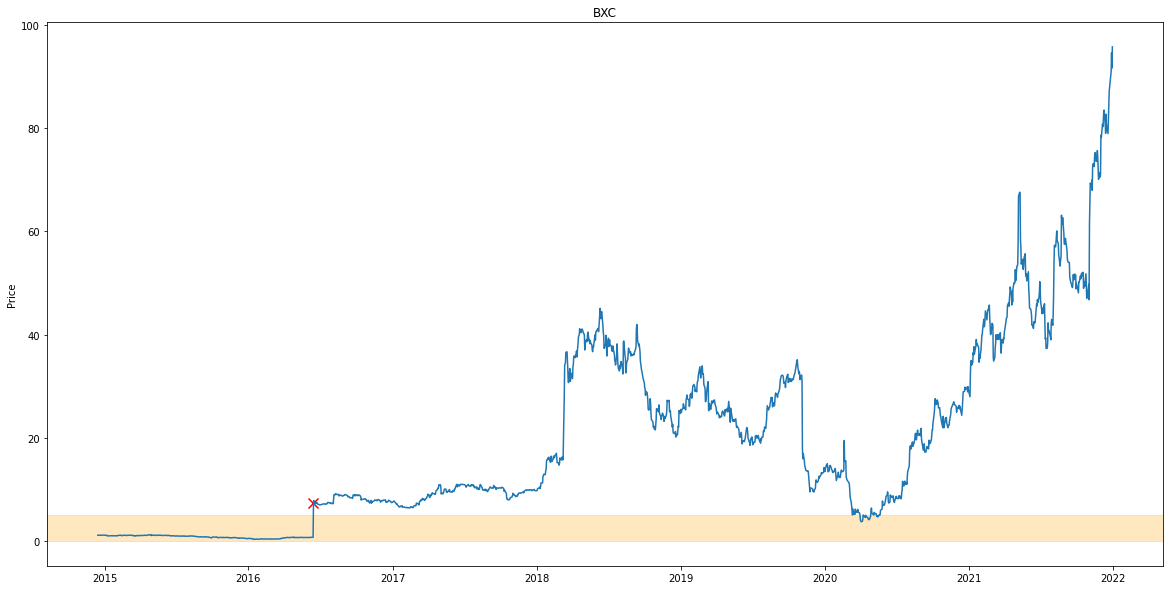

In [11]:
# All stocks in daily stock data
all_stocks = daily_stock_data['cusip'].unique()

# get a random one and plot it's price
random_stock = np.random.choice(all_stocks)
random_stock_data = daily_stock_data[daily_stock_data['cusip'] == random_stock].copy()
# ajexdi_change = ajexdi_curr - ajexdi_prev
random_stock_data['ajexdi_change'] = random_stock_data['ajexdi'] - random_stock_data['ajexdi'].shift(1)




fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(random_stock_data['date'], random_stock_data['prccd'])

splits = random_stock_data[random_stock_data['ajexdi_change'] != 0]

if(len(splits) > 0):
    # Big markers
    colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
    ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
# Draw horizontal span at 1 alpha = 0.25 in orange
ax.axhspan(0, 5, alpha=0.25, color='orange')

# Add ticker to title
ax.set_title(random_stock_data.iloc[0]['tic'])
# Add y axis label
ax.set_ylabel('Price')
plt.show()

In [12]:
len(all_stocks)

542

In [13]:
institutional_holdings_filename = './../data/institutional_data_5_thresh.csv'
institutional_holdings = pd.read_csv(institutional_holdings_filename)


display(institutional_holdings)

C:\Users\amrit\AppData\Local\Temp\ipykernel_8764\90189037.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  institutional_holdings = pd.read_csv(institutional_holdings_filename)


,fdate,cusip,mgrno,type,shares,sole,shared,no
0,2005/09/30,00081T10,220,5,7700,7700,0,0
1,2005/09/30,00081T10,650,5,20000,20000,0,0
2,2005/09/30,00081T10,800,5,47,0,0,47
3,2005/09/30,00081T10,1025,5,235,0,0,235
4,2005/09/30,00081T10,1380,1,14009,0,0,14009
...,...,...,...,...,...,...,...,...
6323720,2021/12/31,Y8565N30,75100,5,410247,331040,0,79207
6323721,2021/12/31,Y8565N30,76760,5,335692,335692,0,0
6323722,2021/12/31,Y8565N30,81540,1,308698,282600,0,26098
6323723,2021/12/31,Y8565N30,84900,5,10775,10775,0,0


In [14]:
# groupby cusip and fdate and type and get the sum of shares
institutional_holdings_agg = institutional_holdings.groupby(['cusip', 'fdate', 'type'])['shares'].sum().reset_index()

institutional_holdings_agg

# Just type == 5
institutional_holdings_agg = institutional_holdings_agg[institutional_holdings_agg['type'] == 5]

# Make fdate a datetime
institutional_holdings_agg['fdate'] = pd.to_datetime(institutional_holdings_agg['fdate'], format='%Y/%m/%d')

In [15]:
display(institutional_holdings_agg)

# count the number of unique cusips
len(institutional_holdings_agg['cusip'].unique())

,cusip,fdate,type,shares
4,6050510,2007-09-30,5,1408634026
9,6050510,2007-12-31,5,1602243439
14,6050510,2008-03-31,5,1645029389
19,6050510,2008-06-30,5,1524781388
24,6050510,2008-09-30,5,1338813364
...,...,...,...,...
190232,Y8565N30,2020-12-31,5,6285495
190237,Y8565N30,2021-03-31,5,6789428
190242,Y8565N30,2021-06-30,5,7484166
190247,Y8565N30,2021-09-30,5,6453160


1301

In [16]:
daily_stock_data['cusip_brief'] = daily_stock_data['cusip'].apply(lambda x: str(x)[:8])

In [17]:
# make institution holdings agg daily instead of quarterly by resampling
institutional_holdings_agg_daily = institutional_holdings_agg.set_index('fdate').groupby('cusip')['shares'].resample('D').ffill().reset_index()

display(institutional_holdings_agg_daily)

# count the number of cusip
institutional_holdings_agg_daily['cusip'].nunique()

,cusip,fdate,shares
0,6050510,2007-09-30,1408634026
1,6050510,2007-10-01,1408634026
2,6050510,2007-10-02,1408634026
3,6050510,2007-10-03,1408634026
4,6050510,2007-10-04,1408634026
...,...,...,...
4197399,Y8565N30,2021-12-27,6453160
4197400,Y8565N30,2021-12-28,6453160
4197401,Y8565N30,2021-12-29,6453160
4197402,Y8565N30,2021-12-30,6453160


1301

In [18]:
# Merge with daily stock data
daily_stock_data_merged = daily_stock_data.merge(institutional_holdings_agg_daily, how='left', left_on=['cusip_brief', 'date'], right_on=['cusip', 'fdate'])

In [19]:
len(daily_stock_data_merged)

545306

In [20]:
# drop na cusip_y
daily_stock_data_merged = daily_stock_data_merged.dropna(subset=['cusip_y'])

# count the number of cusip
daily_stock_data_merged['cusip_y'].nunique()

258

In [21]:


display(daily_stock_data_merged.dtypes)
# Count the number of missing values
display(daily_stock_data_merged.isna().sum())

daily_stock_data_merged

gvkey                               int64
iid                                object
datadate                           object
tic                                object
cusip_x                            object
ajexdi                            float64
cshoc                             float64
cshtrd                            float64
prccd                             float64
prchd                             float64
prcld                             float64
prcod                             float64
prcstd                            float64
trfd                              float64
exchg                             float64
fic                                object
loc                                object
sic                               float64
date                       datetime64[ns]
first_time_below_thresh             int64
cusip_brief                        object
cusip_y                            object
fdate                      datetime64[ns]
shares                            

gvkey                         0
iid                           0
datadate                      0
tic                           0
cusip_x                       0
ajexdi                        0
cshoc                      1188
cshtrd                       12
prccd                         8
prchd                        75
prcld                         8
prcod                      3435
prcstd                        8
trfd                          0
exchg                         0
fic                           0
loc                           0
sic                           0
date                          0
first_time_below_thresh       0
cusip_brief                   0
cusip_y                       0
fdate                         0
shares                        0
dtype: int64

,gvkey,iid,datadate,tic,cusip_x,ajexdi,cshoc,cshtrd,prccd,prchd,...,exchg,fic,loc,sic,date,first_time_below_thresh,cusip_brief,cusip_y,fdate,shares
4881,3243,31,2018/04/02,C.WA,172967226,1.0,NaN,551501.0,0.045,0.0600,...,11.0,USA,USA,6199.0,2018-04-02,1,17296722,17296722,2018-04-02,127700625.0
4882,3243,31,2018/04/03,C.WA,172967226,1.0,NaN,5388842.0,0.045,0.0500,...,11.0,USA,USA,6199.0,2018-04-03,1,17296722,17296722,2018-04-03,127700625.0
4883,3243,31,2018/04/04,C.WA,172967226,1.0,NaN,52170.0,0.044,0.0475,...,11.0,USA,USA,6199.0,2018-04-04,1,17296722,17296722,2018-04-04,127700625.0
4884,3243,31,2018/04/05,C.WA,172967226,1.0,NaN,491901.0,0.059,0.0690,...,11.0,USA,USA,6199.0,2018-04-05,1,17296722,17296722,2018-04-05,127700625.0
4885,3243,31,2018/04/06,C.WA,172967226,1.0,NaN,9110.0,0.055,0.0550,...,11.0,USA,USA,6199.0,2018-04-06,1,17296722,17296722,2018-04-06,127700625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545301,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.920,11.3900,...,11.0,MHL,CAN,4412.0,2021-12-27,1,Y8565N30,Y8565N30,2021-12-27,6453160.0
545302,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.940,11.2500,...,11.0,MHL,CAN,4412.0,2021-12-28,1,Y8565N30,Y8565N30,2021-12-28,6453160.0
545303,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.660,10.9300,...,11.0,MHL,CAN,4412.0,2021-12-29,1,Y8565N30,Y8565N30,2021-12-29,6453160.0
545304,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.690,10.9500,...,11.0,MHL,CAN,4412.0,2021-12-30,1,Y8565N30,Y8565N30,2021-12-30,6453160.0


In [22]:
# ownership percentage. shares / cshoc

daily_stock_data_merged['instituional_ownership_perc'] = daily_stock_data_merged['shares'] / daily_stock_data_merged['cshoc']


display(daily_stock_data_merged)

,gvkey,iid,datadate,tic,cusip_x,ajexdi,cshoc,cshtrd,prccd,prchd,...,fic,loc,sic,date,first_time_below_thresh,cusip_brief,cusip_y,fdate,shares,instituional_ownership_perc
4881,3243,31,2018/04/02,C.WA,172967226,1.0,NaN,551501.0,0.045,0.0600,...,USA,USA,6199.0,2018-04-02,1,17296722,17296722,2018-04-02,127700625.0,NaN
4882,3243,31,2018/04/03,C.WA,172967226,1.0,NaN,5388842.0,0.045,0.0500,...,USA,USA,6199.0,2018-04-03,1,17296722,17296722,2018-04-03,127700625.0,NaN
4883,3243,31,2018/04/04,C.WA,172967226,1.0,NaN,52170.0,0.044,0.0475,...,USA,USA,6199.0,2018-04-04,1,17296722,17296722,2018-04-04,127700625.0,NaN
4884,3243,31,2018/04/05,C.WA,172967226,1.0,NaN,491901.0,0.059,0.0690,...,USA,USA,6199.0,2018-04-05,1,17296722,17296722,2018-04-05,127700625.0,NaN
4885,3243,31,2018/04/06,C.WA,172967226,1.0,NaN,9110.0,0.055,0.0550,...,USA,USA,6199.0,2018-04-06,1,17296722,17296722,2018-04-06,127700625.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545301,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.920,11.3900,...,MHL,CAN,4412.0,2021-12-27,1,Y8565N30,Y8565N30,2021-12-27,6453160.0,0.220999
545302,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.940,11.2500,...,MHL,CAN,4412.0,2021-12-28,1,Y8565N30,Y8565N30,2021-12-28,6453160.0,0.220999
545303,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.660,10.9300,...,MHL,CAN,4412.0,2021-12-29,1,Y8565N30,Y8565N30,2021-12-29,6453160.0,0.220999
545304,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.690,10.9500,...,MHL,CAN,4412.0,2021-12-30,1,Y8565N30,Y8565N30,2021-12-30,6453160.0,0.220999


In [23]:
daily_stock_data_merged.columns

Index(['gvkey', 'iid', 'datadate', 'tic', 'cusip_x', 'ajexdi', 'cshoc',
       'cshtrd', 'prccd', 'prchd', 'prcld', 'prcod', 'prcstd', 'trfd', 'exchg',
       'fic', 'loc', 'sic', 'date', 'first_time_below_thresh', 'cusip_brief',
       'cusip_y', 'fdate', 'shares', 'instituional_ownership_perc'],
      dtype='object')

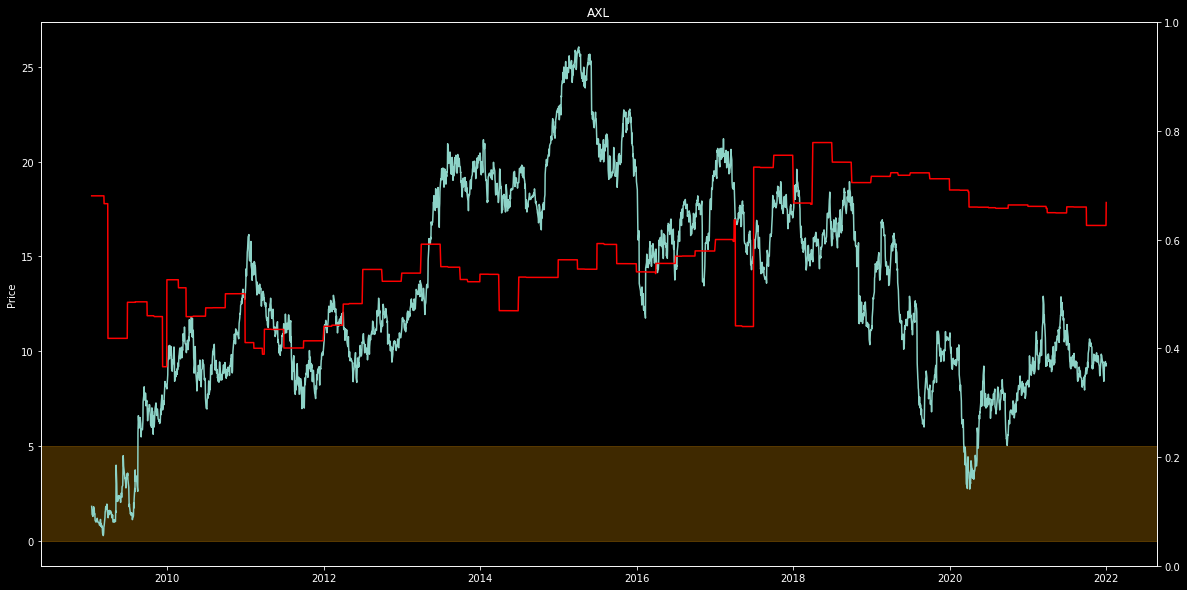

In [62]:
# All stocks in daily stock data
all_stocks = daily_stock_data_merged['cusip_x'].unique()

# get a random one and plot it's price
random_stock = np.random.choice(all_stocks)
random_stock_data = daily_stock_data_merged[daily_stock_data_merged['cusip_x'] == random_stock].copy()
# ajexdi_change = ajexdi_curr - ajexdi_prev
random_stock_data['ajexdi_change'] = random_stock_data['ajexdi'] - random_stock_data['ajexdi'].shift(1)




fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(random_stock_data['date'], random_stock_data['prccd'])

splits = random_stock_data[random_stock_data['ajexdi_change'] != 0]

if(len(splits) > 0):
    # Big markers
    colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
    ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
# Draw horizontal span at 1 alpha = 0.25 in orange
ax.axhspan(0, 5, alpha=0.25, color='orange')

# Plot institutional ownership with twin y 
ax2 = ax.twinx()
ax2.plot(random_stock_data['date'], random_stock_data['instituional_ownership_perc'], color='red')
ax2.set_ylim(0, 1)
# Add ticker to title
ax.set_title(random_stock_data.iloc[0]['tic'])
# Add y axis label
ax.set_ylabel('Price')
plt.show()

For stock VHC with ownership percentage 0, the returns are [].
Cusip: 92823T108


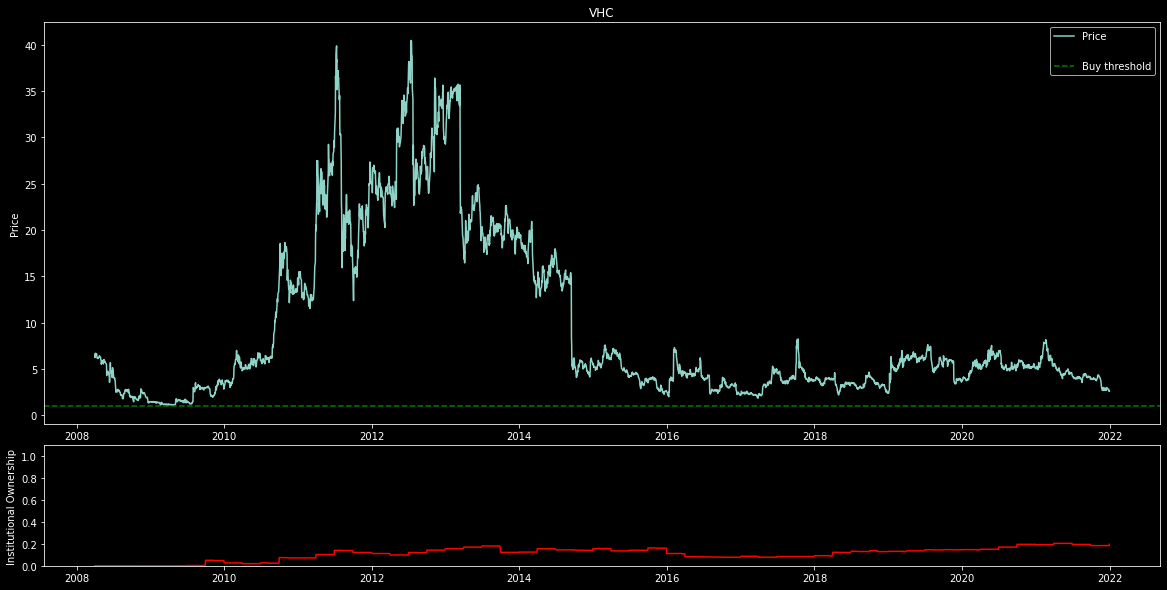

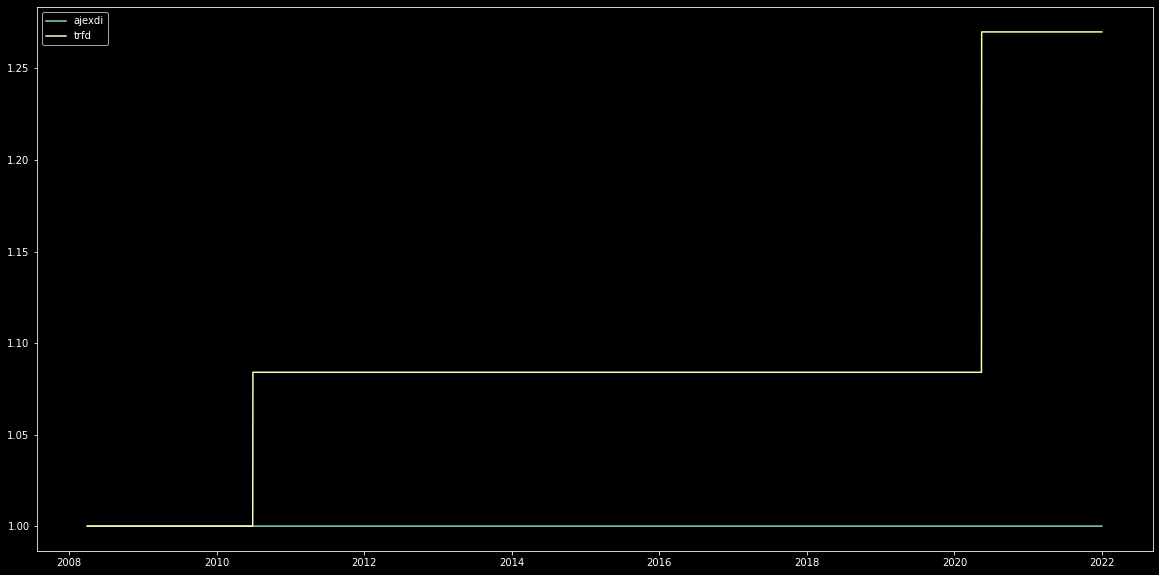

,cusip,tic,ownershipPerc,startDate,30,90,180
0,00081T108,ACCO,0.503035,2008-11-17,1.791209,0.538462,2.472527
1,00191G103,ARC,0.401841,2020-03-12,-0.275945,0.060986,0.081389
2,00191G103,ARC,0.341888,2020-09-11,0.060000,0.360000,1.251089
3,00439T206,ACW,0.429111,2016-01-15,-0.054152,0.621453,0.299241
4,00739W107,AEA,0.251493,2009-02-23,1.050505,3.282886,4.985005
...,...,...,...,...,...,...,...
248,Y7388L103,SB,0.110486,2020-03-16,0.220788,0.488199,0.197535
249,Y7388L103,SB,0.103391,2020-10-19,0.032702,0.873038,1.531133
250,Y8565N300,TNK,0.214864,2018-05-21,0.271100,0.047387,0.128737
251,Y8565N300,TNK,0.170981,2018-12-17,0.066965,0.016157,0.138096


In [72]:
# Final data export to pkl
daily_stock_data_merged.to_pickle('./../data/daily_stock_data_merged.pkl')

import datetime
# import make axes locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable
# set dark theme for matplotlib
# plt.style.use('dark_background')


i = 0
plot = False

last_date = daily_stock_data_merged['date'].max()

allTrades = []

cusips_of_interest = ['92823T108', '23311P209']

# Iterate over every stock by cusip
for index, group in daily_stock_data_merged.groupby('cusip_x'):
    i += 1

    # If state is 0, then look for a buy signal (price <= threshold)
    #   If found, set state to 1 and set tradeStartDate to the date of the buy signal, , record the ownership percentage.
    # If state is 1, then look for whether it's been 30 days, 90 days, or 180 days since the tradeStartDate
    #   If it's been 30 days, then record cumulative return.
    #   If it's been 90 days, then record cumulative return.
    #   If it's been 180 days, then record cumulative return and set state to 0.

    returns = []

    returns_agg = {
        '30': -1,
        '90': -1,
        '180': -1
    }
    trades = []

    ownershipPerc = 0
    state = 6
    prevAdjPrice = np.NaN
    for index, day in group.iterrows():
        if(state == 6 and day['prccd'] > threshold):
            state = 0
        elif(state == 0 and day['prccd'] <= threshold):
            state = 1
            tradeStartDate = day['date']
            prevAdjPrice = day['prccd'] / day['ajexdi'] * day['trfd']
            ownershipPerc = day['instituional_ownership_perc']
            returns = []

        elif(state != 0):
            ret = 1 + (day['prccd'] / day['ajexdi'] * day['trfd'] - prevAdjPrice) / prevAdjPrice
            prevAdjPrice = day['prccd'] / day['ajexdi'] * day['trfd']
            returns.append(ret)
            if(day['date'] - tradeStartDate >= pd.Timedelta('30 days') and state == 1):
                returns_agg['30'] = np.prod(returns) - 1
                state = 2

            elif(day['date'] - tradeStartDate >= pd.Timedelta('90 days') and state == 2):
                returns_agg['90'] = np.prod(returns) - 1
                state = 3

            elif(day['date'] - tradeStartDate >= pd.Timedelta('180 days') and state == 3):
                returns_agg['180'] = np.prod(returns) - 1
                state = 6

                trades.append({
                    'cusip' : group['cusip_x'].iloc[0],
                    'tic' : group['tic'].iloc[0],
                    'ownershipPerc' : ownershipPerc,
                    'startDate' : tradeStartDate,
                    'returns' : returns_agg.copy()
                })

                returns_agg = {
                    '30' : -1,
                    '90' : -1,
                    '180' : -1
                }
            elif(day['date'] - datetime.timedelta(days = 4) >= last_date):
                state = 5
                break

    # Account for delistings
    if(state != 0 and state != 5 and state != 6):
        trades.append({
            'cusip' : group['cusip_x'].iloc[0],
            'tic' : group['tic'].iloc[0],
            'ownershipPerc' : ownershipPerc,
            'startDate' : tradeStartDate,
            'returns' : returns_agg.copy()
        })

    if(plot or str(group['cusip_x'].iloc[0]) in cusips_of_interest):
        print("For stock " + group['tic'].iloc[0] + " with ownership percentage " + str(ownershipPerc) + ", the returns are " + str(trades) + ".")
        # Plot the price
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(group['date'], group['prccd'])

        group = group.copy()
        group['ajexdi_change'] = group['ajexdi'] - group['ajexdi'].shift(1)
        splits = group[group['ajexdi_change'] != 0]

        if(len(splits) > 0):
            # Big markers
            colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
            ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
        # Draw horizontal dashed line at threshold
        ax.axhline(y=threshold, linestyle='--', color='green')

        # Plot institutional ownership with twin y
        # height of ax2 is 0.2 of ax
        divider = make_axes_locatable(ax)
        ax2 = divider.append_axes("bottom", size="30%", pad=0.3)

        # set ax2 height

        ax2.plot(group['date'], group['instituional_ownership_perc'], color='red')
        ax2.set_ylim(0, 1.1)
        ax2.set_ylabel('Institutional Ownership')
        
        # Add ticker to title
        ax.set_title(group.iloc[0]['tic'])
        # Add y axis label
        ax.set_ylabel('Price')

        for trade in trades:
            ax.axvspan(trade['startDate'] + pd.Timedelta('90 days'), trade['startDate'] + pd.Timedelta('180 days'), alpha=0.1, color='green')
            ax.axvspan(trade['startDate'] + pd.Timedelta('30 days'), trade['startDate'] + pd.Timedelta('90 days'), alpha=0.1, color='yellow')
            ax.axvspan(trade['startDate'] , trade['startDate'] + pd.Timedelta('30 days'), alpha=0.1, color='orange')
            # pre trade period
            ax.axvspan(trade['startDate'] - pd.Timedelta('30 days'), trade['startDate'], alpha=0.1, color='blue')

        # add legend to ax
        ax.legend(['Price', '', 'Buy threshold', '180 day period', '90 day period', '30 day period', 'Before trade start'])

        print('Cusip: ' + str(group['cusip_x'].iloc[0]))

        # plot axjedi and trfd
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(group['date'], group['ajexdi'], label='ajexdi')
        ax.plot(group['date'], group['trfd'], label='trfd')

        ax.legend()

        plt.show()
    

    allTrades += trades

    # if(i >= 10):
    #     break



# Make a df out of allTrades with columns startDate, ownershipPerc, 30, 90, 180, cusip, tic
allTradesDf = pd.DataFrame(allTrades)
# Unwrap the returns column with dict keys as columns and dict values as values
allTradesDf = pd.concat([allTradesDf.drop(['returns'], axis=1), allTradesDf['returns'].apply(pd.Series)], axis=1)

display(allTradesDf)


0-20%     107
20-40%     60
40-60%     47
60-80%     32
80+         4
Name: ownershipPercBin, dtype: int64

,cusip,tic,ownershipPerc,startDate,30,90,180,ownershipPercBin
0,00081T108,ACCO,0.503035,2008-11-17,1.791209,0.538462,2.472527,40-60%
1,00191G103,ARC,0.401841,2020-03-12,-0.275945,0.060986,0.081389,40-60%
2,00191G103,ARC,0.341888,2020-09-11,0.060000,0.360000,1.251089,20-40%
3,00439T206,ACW,0.429111,2016-01-15,-0.054152,0.621453,0.299241,40-60%
4,00739W107,AEA,0.251493,2009-02-23,1.050505,3.282886,4.985005,20-40%
...,...,...,...,...,...,...,...,...
248,Y7388L103,SB,0.110486,2020-03-16,0.220788,0.488199,0.197535,0-20%
249,Y7388L103,SB,0.103391,2020-10-19,0.032702,0.873038,1.531133,0-20%
250,Y8565N300,TNK,0.214864,2018-05-21,0.271100,0.047387,0.128737,20-40%
251,Y8565N300,TNK,0.170981,2018-12-17,0.066965,0.016157,0.138096,0-20%


,mean,median
ownershipPercBin,,
0-20%,0.157557,0.070000
20-40%,0.126805,0.049245
40-60%,0.342408,0.150538
60-80%,0.184936,-0.000608
80+,0.984530,0.256403


,cusip,tic,ownershipPerc,startDate,30,90,180,ownershipPercBin
45,152006102,CG.,0.000192,2008-11-12,2.626263,3.515152,5.888889,0-20%
55,184692200,CEM,0.095057,2020-03-18,2.317073,3.592418,2.215944,0-20%
57,18469Q207,CTR,0.126139,2020-03-18,1.851351,3.318639,2.182740,0-20%
56,18469P209,EMO,0.134944,2020-03-18,1.624599,2.920477,1.844492,0-20%
30,096231105,BXG.1,0.057809,2009-03-06,1.362500,2.725000,2.450000,0-20%
83,31647Q205,FMO,0.137012,2020-03-18,1.255319,2.120087,1.342998,0-20%
59,20440W105,SID,0.014574,2016-02-11,1.115611,2.045197,2.675606,0-20%
214,89148B200,NTG,0.118567,2020-03-18,1.087912,2.227630,1.527738,0-20%
12,01903Q108,ALD.1,0.129314,2009-02-19,0.957143,3.357143,3.442857,0-20%
44,151461209,CEN,0.029355,2020-03-18,0.930028,0.865978,0.442209,0-20%


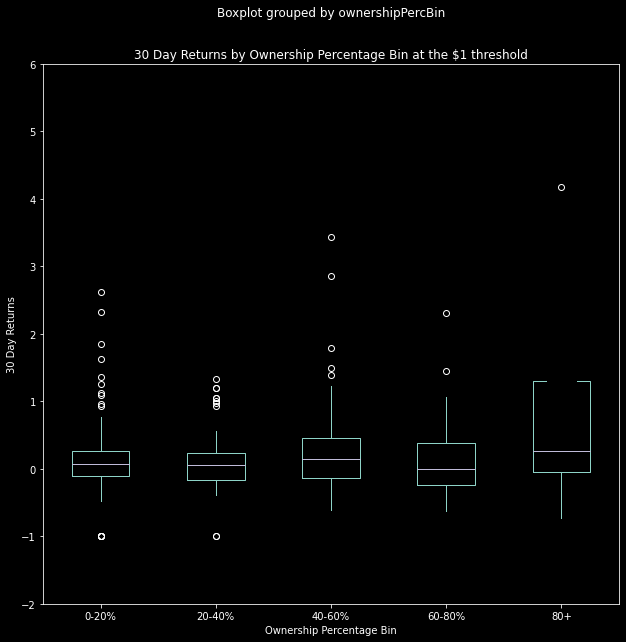

In [69]:
# For the 30 day returns, calculate box plots for returns by ownership percentage bins


# Get the ownership percentage bins using pd.cut
# allTradesDf['ownershipPercBin'] = pd.qcut(allTradesDf['ownershipPerc'], 5, labels=['L', '2', '3', '4', 'H'])

# Bin 0-20%, 20-40%, 40-60%, 60-80%, 80+
allTradesDf['ownershipPercBin'] = pd.cut(allTradesDf['ownershipPerc'], [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80+'])
# Number in each bin
display(allTradesDf['ownershipPercBin'].value_counts())

# Drop nan values
allTradesDfDroppedNan = allTradesDf.dropna()
# Drop rows where 30 day return is greater than 10
allTradesDfDroppedNan = allTradesDfDroppedNan[allTradesDfDroppedNan['30'] < 10]
display(allTradesDfDroppedNan)
# Make a box plot of the 30 day returns by ownership percentage bin
fig, ax = plt.subplots(figsize=(10, 10))

allTradesDfDroppedNan.boxplot(column='30', by='ownershipPercBin', figsize=(20, 10), ax=ax)

# set y axis lim to 0 to 1
ax.set_ylim(-2, 6)
# Make beautiful
ax.set_title('30 Day Returns by Ownership Percentage Bin at the ${} threshold'.format(threshold))
ax.set_xlabel('Ownership Percentage Bin')
ax.set_ylabel('30 Day Returns')

# Remove vertical grid lines
ax.xaxis.grid(False)
# Remove horizontal grid lines
ax.yaxis.grid(False)


# Print the mean and median for each bin for the 30 day returns as a table
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['30'].agg(['mean', 'median']))

allTradesDfDroppedNan[allTradesDfDroppedNan['ownershipPercBin'] == '0-20%'].sort_values(by='30', ascending=False).head(10)


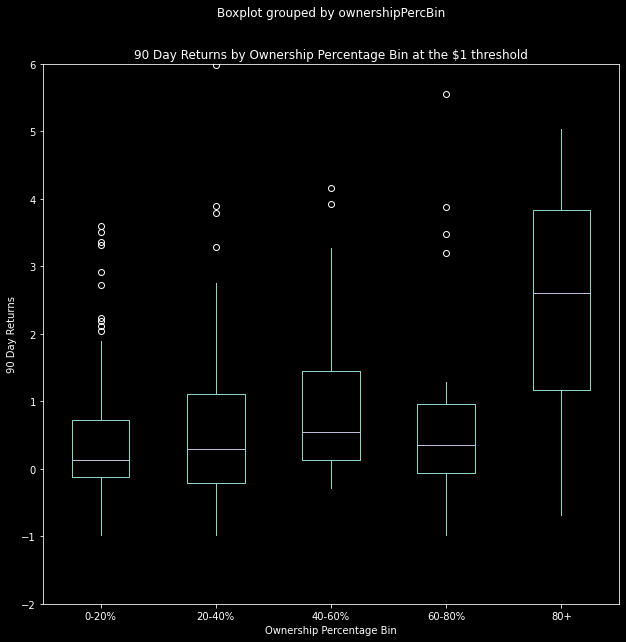

,mean,median
ownershipPercBin,,
0-20%,0.395872,0.134021
20-40%,0.632198,0.299483
40-60%,1.225243,0.546961
60-80%,0.744356,0.352234
80+,2.393678,2.610587


ownershipPercBin
0-20%     105
20-40%     60
40-60%     47
60-80%     32
80+         4
Name: 90, dtype: int64

In [70]:
# Do the same for 90 day returns
fig, ax = plt.subplots(figsize=(10, 10))

allTradesDfDroppedNan.boxplot(column='90', by='ownershipPercBin', figsize=(20, 10), ax=ax)

# set y axis lim to 0 to 1
ax.set_ylim(-2, 6)

# Make beautiful
ax.set_title('90 Day Returns by Ownership Percentage Bin at the ${} threshold'.format(threshold))
ax.set_xlabel('Ownership Percentage Bin')
ax.set_ylabel('90 Day Returns')

# Remove vertical grid lines
ax.xaxis.grid(False)
# Remove horizontal grid lines
ax.yaxis.grid(False)

plt.show()

# Print the mean and median for each bin for the 90 day returns as a table
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['90'].agg(['mean', 'median']))

# Number of trades in each bin
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['90'].count())

In [66]:
# 90 - day equal width bins


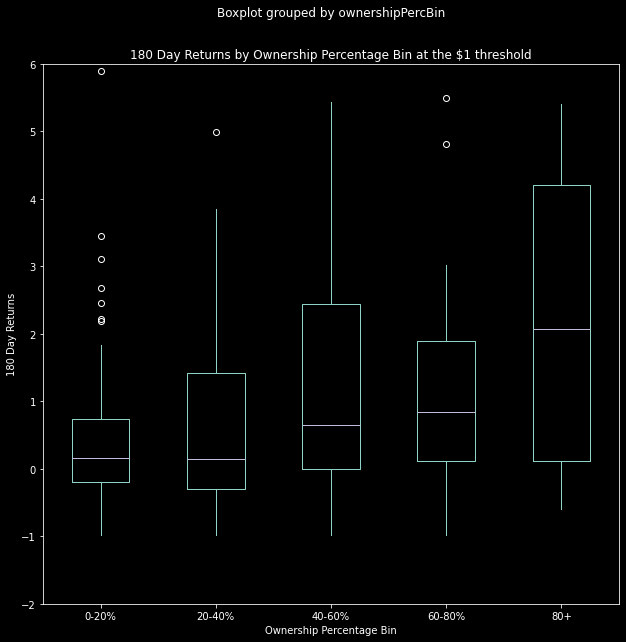

,mean,median
ownershipPercBin,,
0-20%,0.347388,0.165712
20-40%,0.970419,0.149211
40-60%,1.705205,0.648668
60-80%,1.286925,0.845829
80+,2.238807,2.076690


ownershipPercBin
0-20%     105
20-40%     60
40-60%     47
60-80%     32
80+         4
Name: 180, dtype: int64

In [71]:
# Do the same for 180 day returns
fig, ax = plt.subplots(figsize=(10, 10))

allTradesDfDroppedNan.boxplot(column='180', by='ownershipPercBin', figsize=(20, 10), ax=ax)

# set y axis lim to 0 to 1
ax.set_ylim(-2, 6)

# Make beautiful
ax.set_title('180 Day Returns by Ownership Percentage Bin at the ${} threshold'.format(threshold))
ax.set_xlabel('Ownership Percentage Bin')
ax.set_ylabel('180 Day Returns')

# Remove vertical grid lines
ax.xaxis.grid(False)
# Remove horizontal grid lines
ax.yaxis.grid(False)

plt.show()

# Print the mean and median for each bin for the 180 day returns as a table
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['180'].agg(['mean', 'median']))

# Number of trades in each bin
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['180'].count())
